# Лабораторная работа №1

## Задания:
- Найдите временной ряд с ценами активов (цены акций, облигаций, нефти, криптовалюты и т.д.)
- Отобразите временной ряд на графике
- Оцените его
- Сделайте начальные выводы
- Постройте 4 скользящие средние с окнами (5, 10, 30, 50)
- Оцените график с скользящими средними
- Сделайте предыдущие 2 пункта с экспоненциальными скользящими средними
- Сделайте прогноз движения актива на основе экспоненциального скользящего среднего на 5 периодов вперед.
- Сделайте выводы по проделанной работе и опишите их.

## Подключение и преднастройка необходимых компонент

Подключение Google Drive

In [7]:
%%time
# монтируем диск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CPU times: user 16.9 ms, sys: 1.75 ms, total: 18.7 ms
Wall time: 1.62 s


Подключение глобально необходимых библиотек

In [8]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

## Описание набора данных

Исторические данные о ежедневных ценах и объемах по американским акциям (AADR), торгуемым на NYSE, NASDAQ и NYSE MKT.

Данные (2010-2017) представлены в формате CSV следующим образом:
- **Дата**  
- **Открытие**  
- **Максимум**  
- **Минимум**  
- **Закрытие**  
- **Объем**  
- **OpenInt**  

## 1. Временной ряд с ценами активов

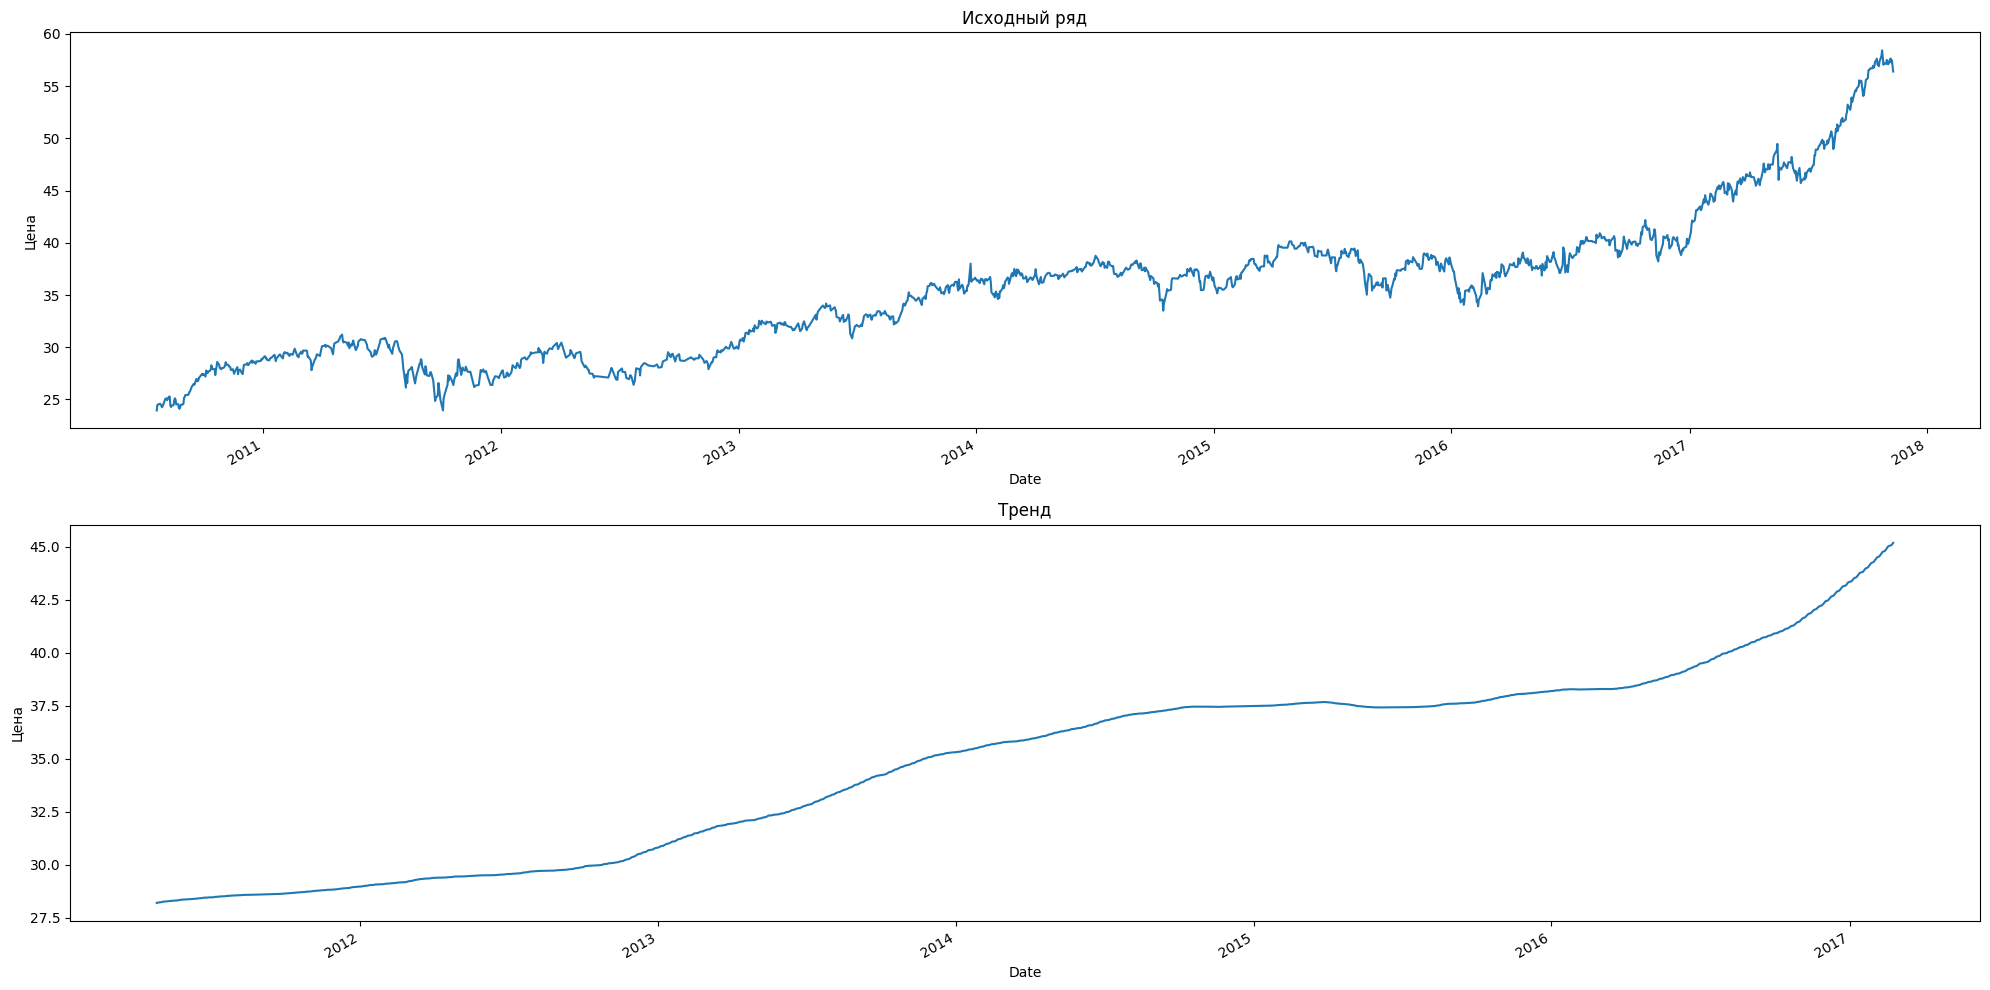

In [9]:
data = pd.read_csv("/content/drive/MyDrive/data.csv", parse_dates=True, index_col="Date")
decomposition = seasonal_decompose(data['Close'], model='additive', period=365)

# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 10))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
plt.rcParams['figure.figsize'] = [20, 10]

decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Цена')
ax1.set_title('Исходный ряд')

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Цена')
ax2.set_title('Тренд')

# decomposition.seasonal.plot(ax=ax3)
# ax3.set_ylabel('Цена')
# ax3.set_title('Сезонность')

# decomposition.resid.plot(ax=ax4)
# ax4.set_ylabel('Цена')
# ax4.set_title('Нерегулярность')

plt.tight_layout()
plt.show()

**Исходный ряд** (верхний график): Видна высокая волатильность в некоторые годы, а затем наблюдается устойчивый рост с конца 2016 года.

**Тренд** (нижний график): На этом графике наблюдается плавный восходящий тренд, особенно с 2012 года. Это свидетельствует о том, что в долгосрочной перспективе цена акции увеличивалась, несмотря на колебания и краткосрочные изменения, видимые в исходном ряде.

## 2 Скользящие средние

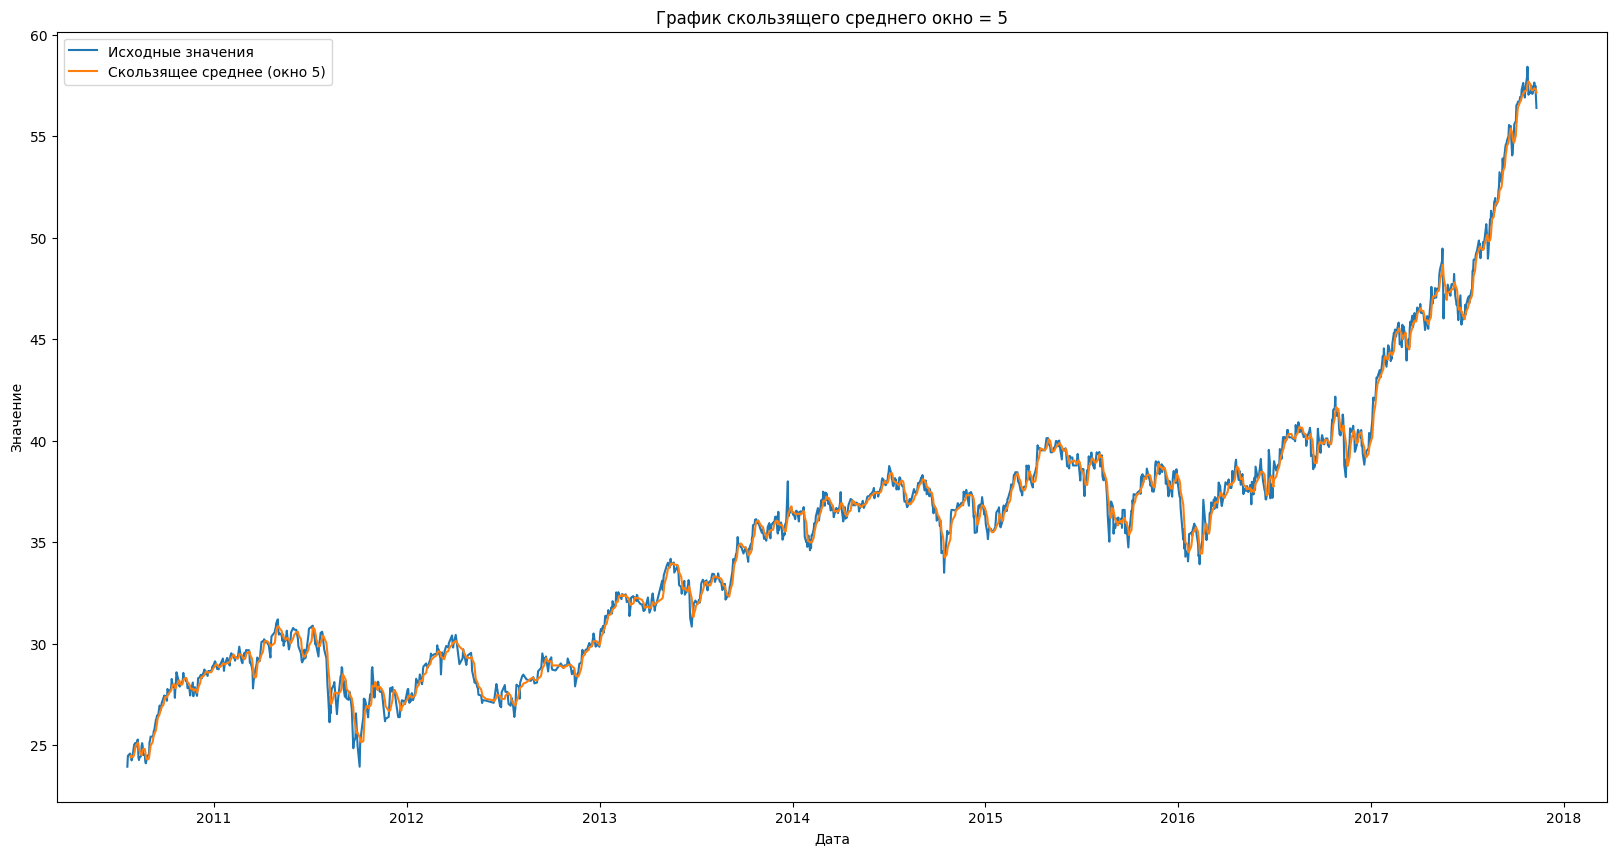

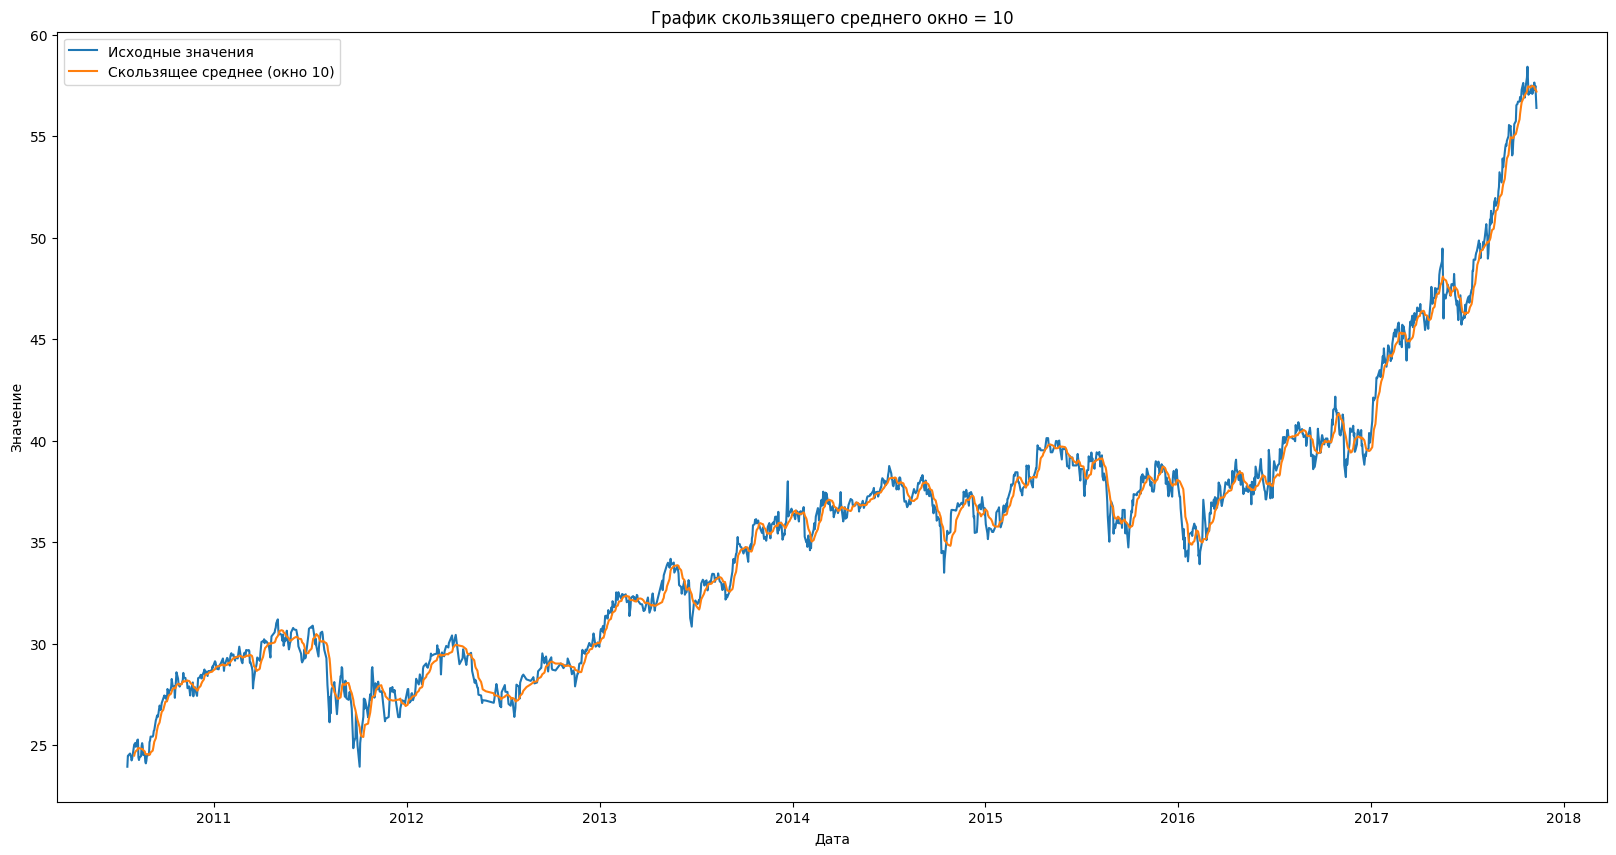

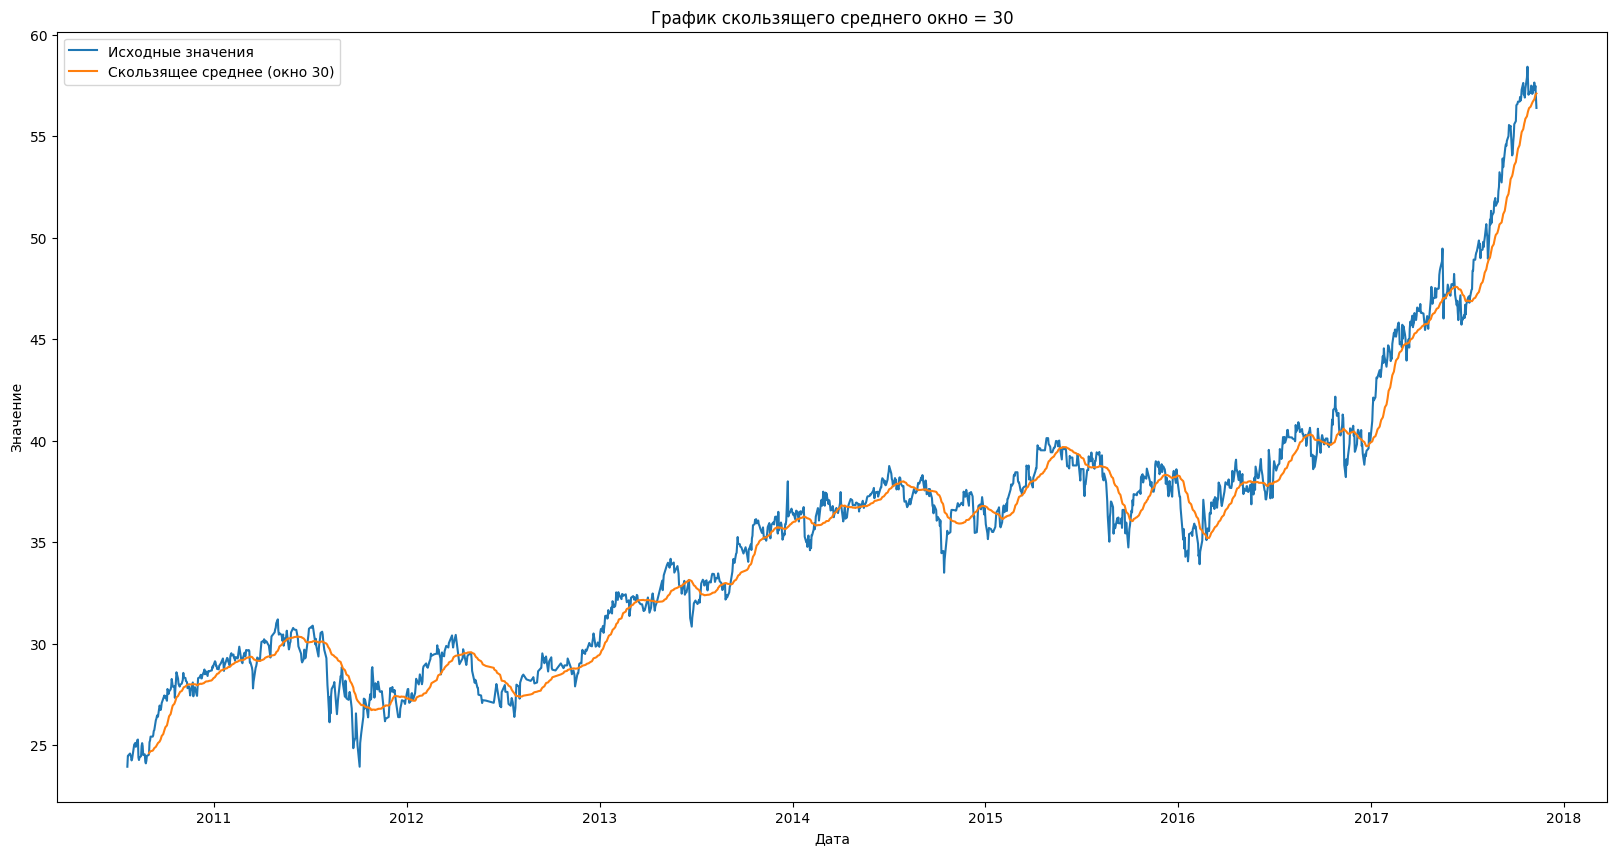

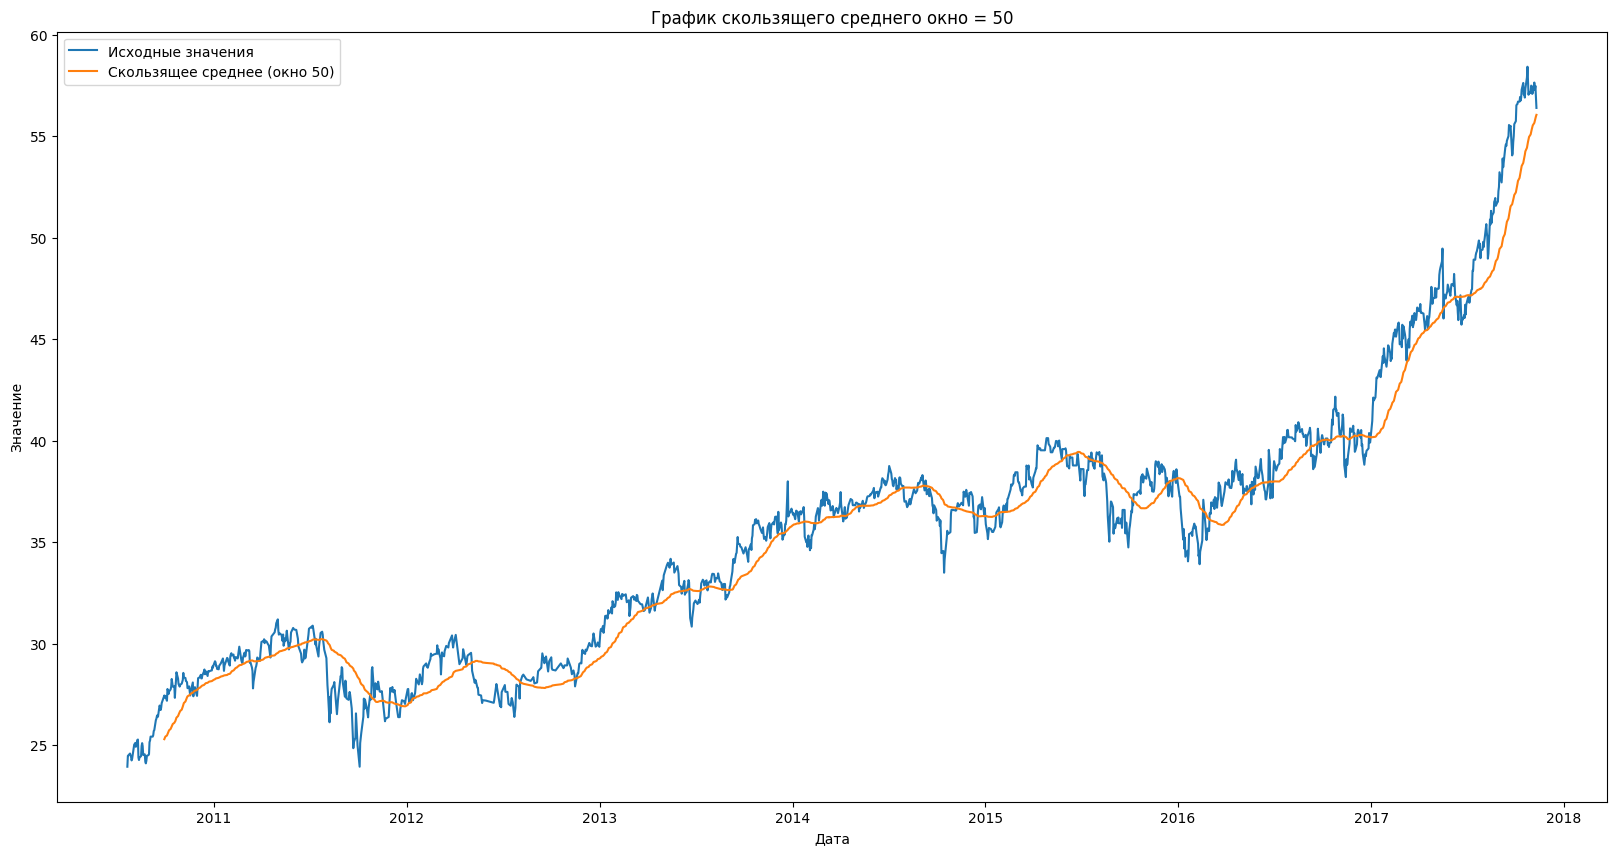

In [10]:
for i in [5,10,30,50]:
    rolling_mean = data["Close"].rolling(window=i).mean()
    plt.plot(data.index, data["Close"], label="Исходные значения")
    plt.plot(data.index, rolling_mean, label=f"Скользящее среднее (окно {i})")
    plt.xlabel("Дата")
    plt.ylabel("Значение")
    plt.title(f"График скользящего среднего окно = {i}")
    plt.legend()
    plt.show()

**Скользящее среднее**: на каждом графике помимо исходных данных, изображена линия скользящего среднего для разных значений окна (5, 10, 30, 50). Окно определяет количество дней, за которые вычисляется среднее значение.

 **Окно 5:**
    Скользящее среднее почти совпадает с исходными значениями, так как окно достаточно маленькое -- тренд и волатильность остаются видимыми.

 **Окно 10:**
    Скользящее среднее немного сглаживает резкие изменения, но по-прежнему следует за краткосрочными колебаниями.
    Линия скользящего среднего плавнее, чем при окне 5, но также подвержена изменениям из-за локальных скачков.

 **Окно 30:**
    Скользящее среднее заметно сглаживает резкие изменения. Мелкие колебания исчезли, но крупные тренды остаются.
    Периоды с низкой волатильностью стали более плавными, а резкие изменения менее заметны.

 **Окно 50:**
    Здесь видно более долгосрочный сглаженный тренд, который еще меньше подвержен краткосрочным колебаниям.
    Важные изменения в цене акций (например, резкие скачки или падения) стали наименее очевидными, так как они распределены на большее количество дней.

**Маленькое окно хорошо показывает краткосрочные изменения и колебания рынка, сохраняя более детализированный вид временного ряда. Большие окна предназначены для выявления долгосрочных трендов, игнорируя краткосрочные колебания и шум.**

*Скользящие средние являются по сути КИХ фильтрами высоких частот, если рассматривать временной ряд как сигнал. Чем больше окно (порядок  фильтра), тем более гладкий график имеем (больше высоких частот срезается).*

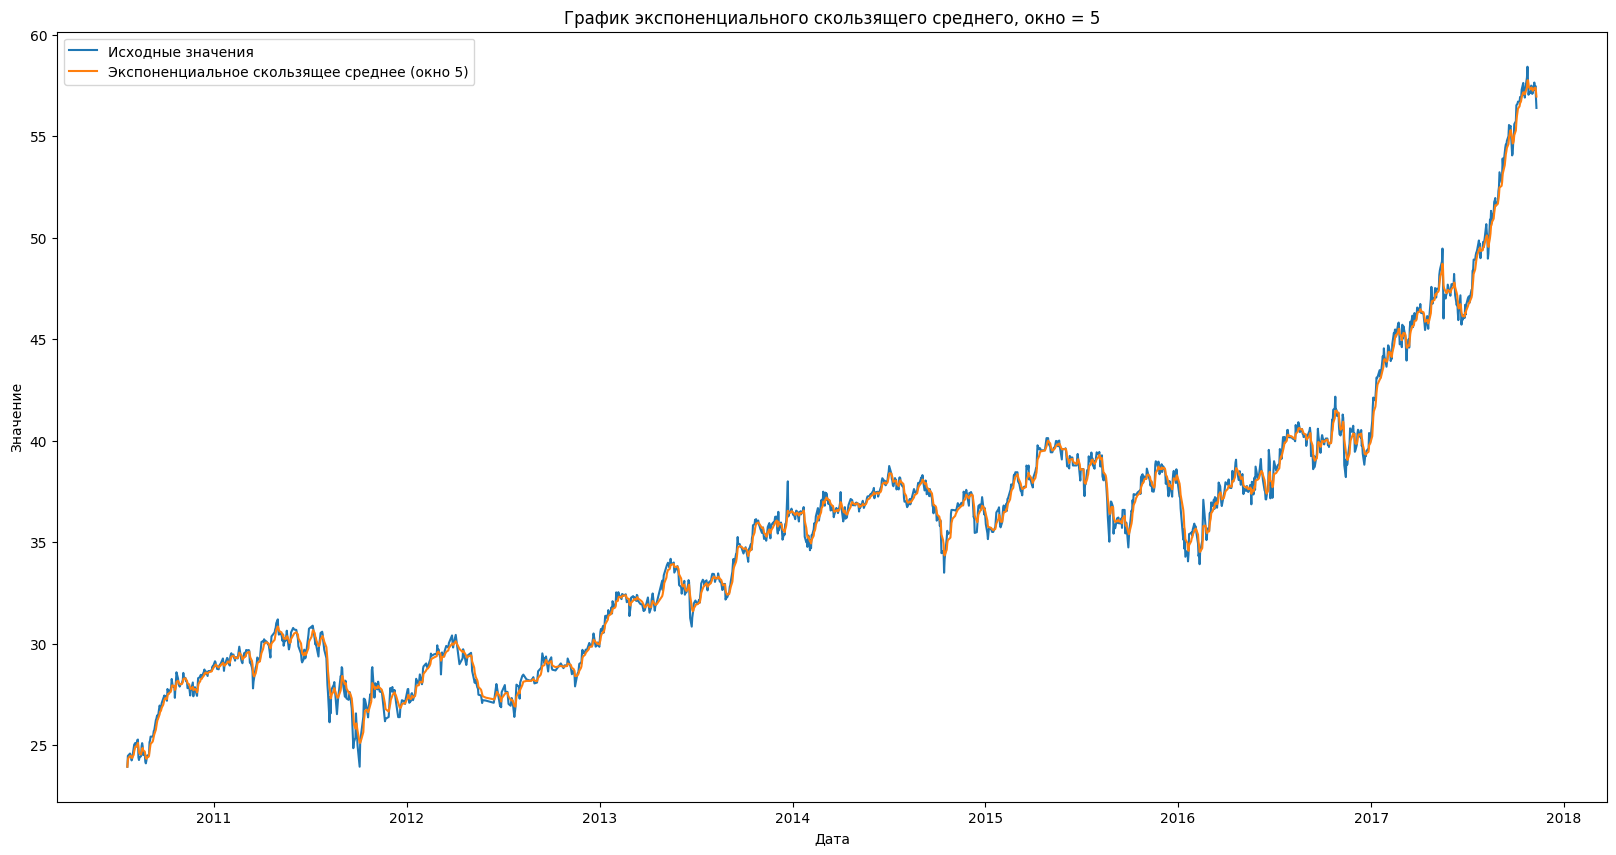

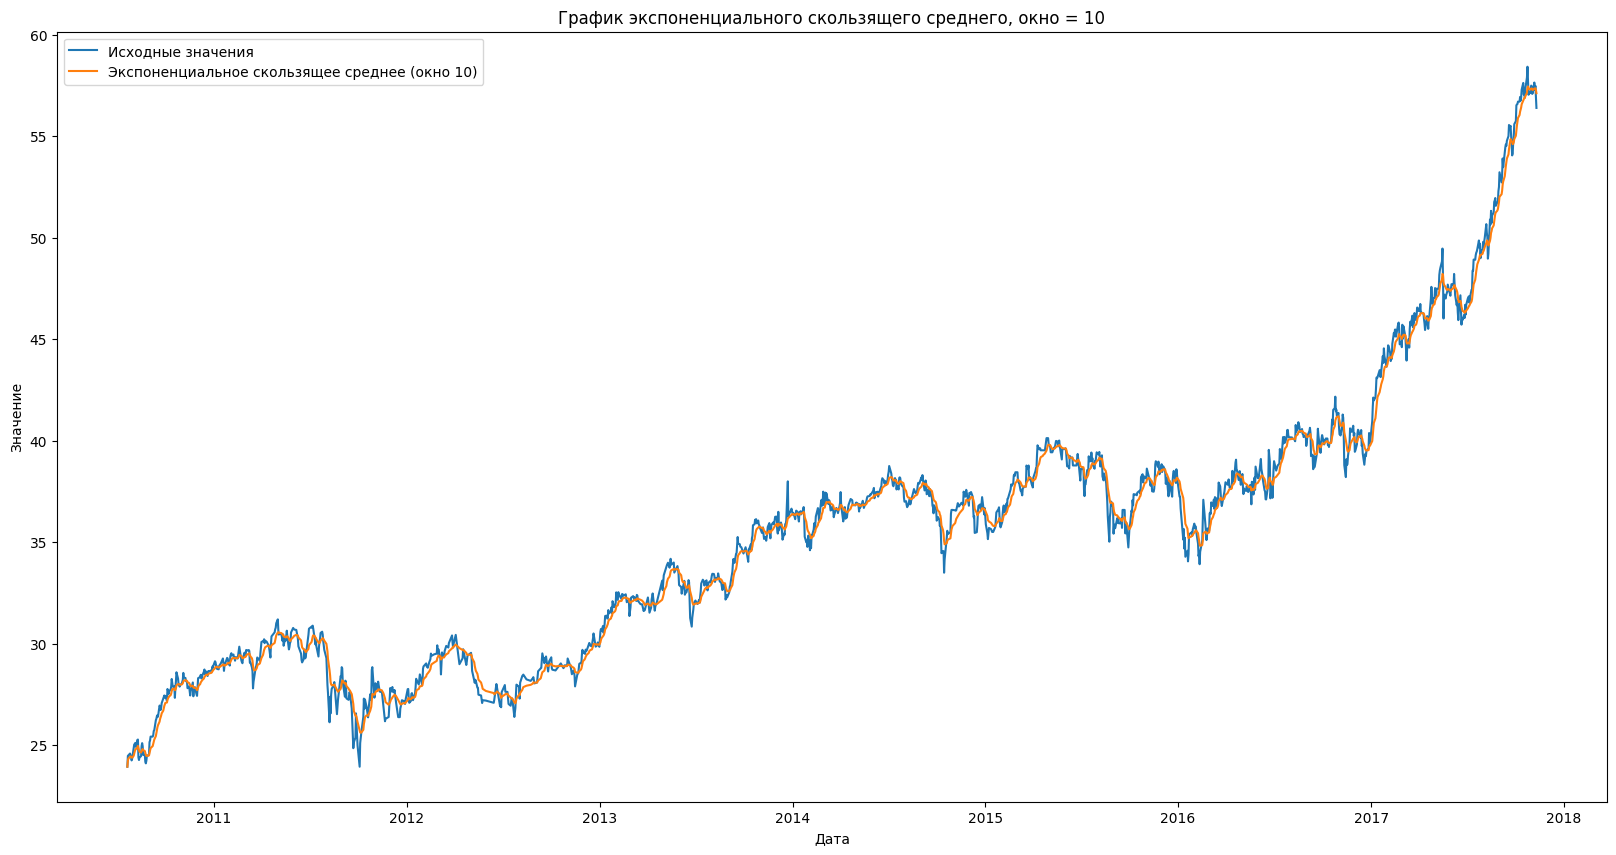

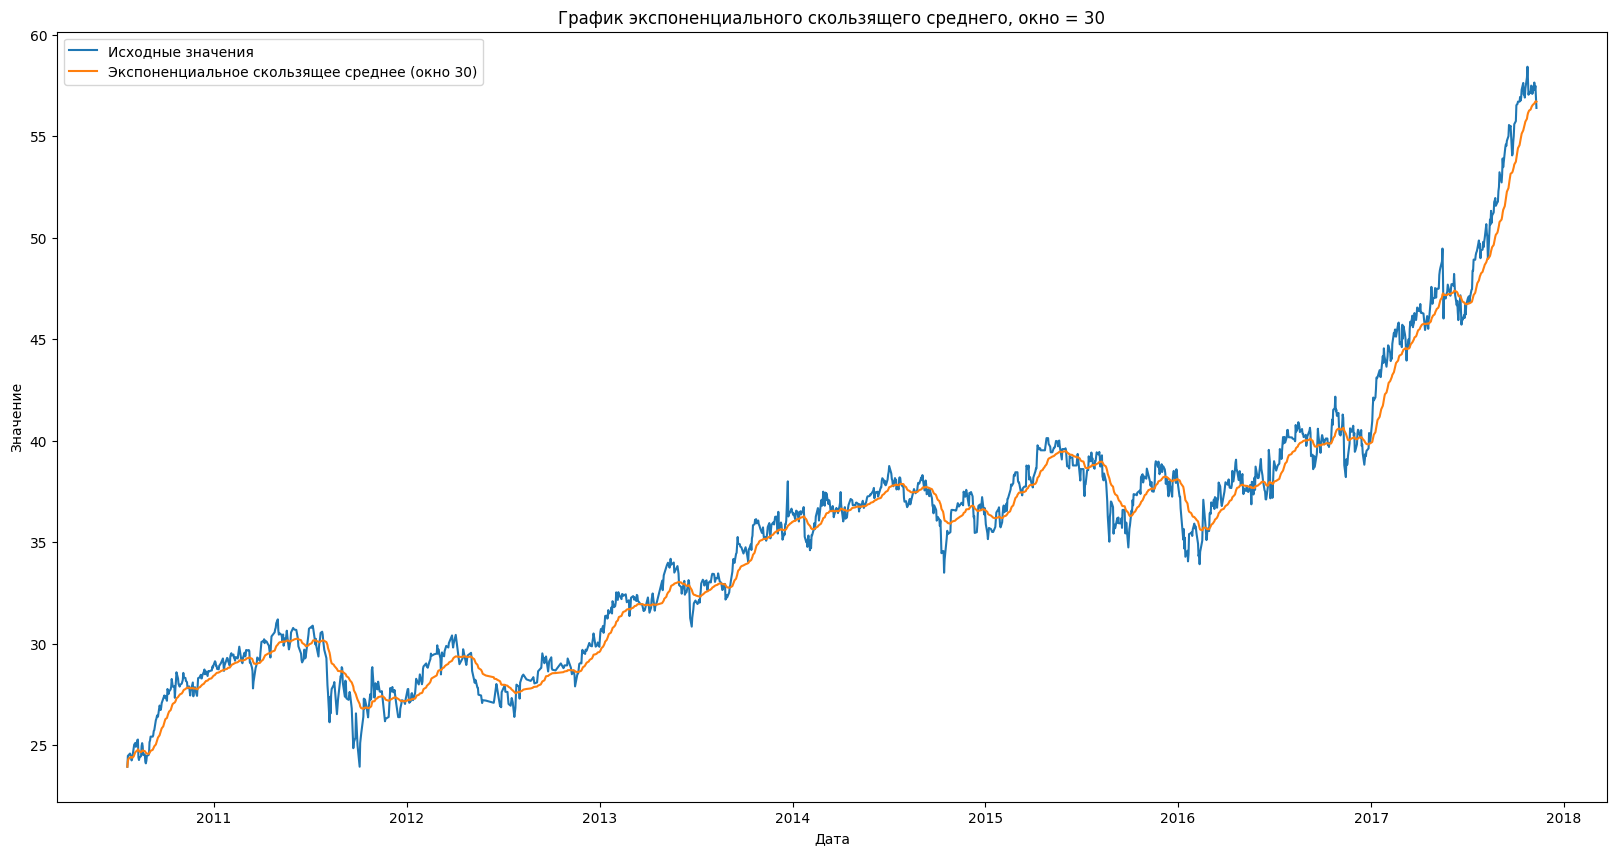

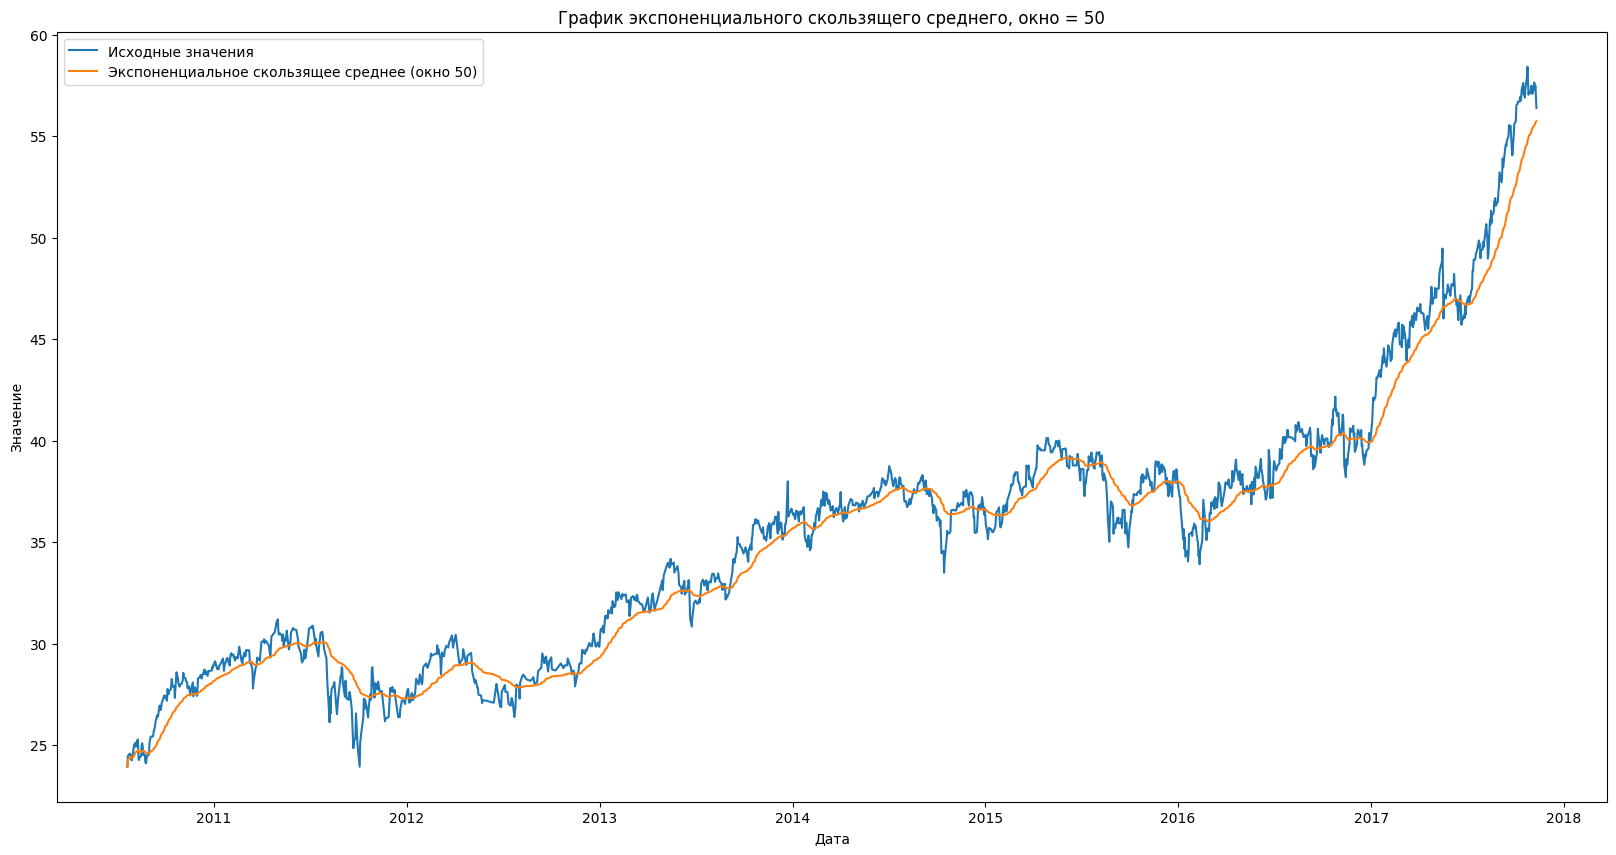

In [11]:
for i in [5, 10, 30, 50]:
    ema = data["Close"].ewm(span=i).mean()
    plt.plot(data.index, data["Close"], label="Исходные значения")
    plt.plot(data.index, ema, label=f"Экспоненциальное скользящее среднее (окно {i})")
    plt.xlabel("Дата")
    plt.ylabel("Значение")
    plt.title(f"График экспоненциального скользящего среднего, окно = {i}")
    plt.legend()
    plt.show()

В этом примере используется экспоненциальное скользящее среднее (EMA) вместо обычного скользящего среднего. Главное отличие заключается в том, что EMA придает больший вес последним данным, что делает его более чувствительным к недавним изменениям цены, в то время как обычное скользящее среднее равномерно распределяет вес на все значения внутри окна.

**В итоге, EMA более подходит для тех случаев, когда важно учитывать последние изменения и быстрее реагировать на колебания рынка, в отличие от обычного скользящего среднего, которое больше фокусируется на общей тенденции. Т.е. экспоненциальное скользящее среднее больше подходит для краткосрочного планирования, а обычное скользящее среднее для долгосрочного.**

## Прогнозирование с авторегрессионной моделью

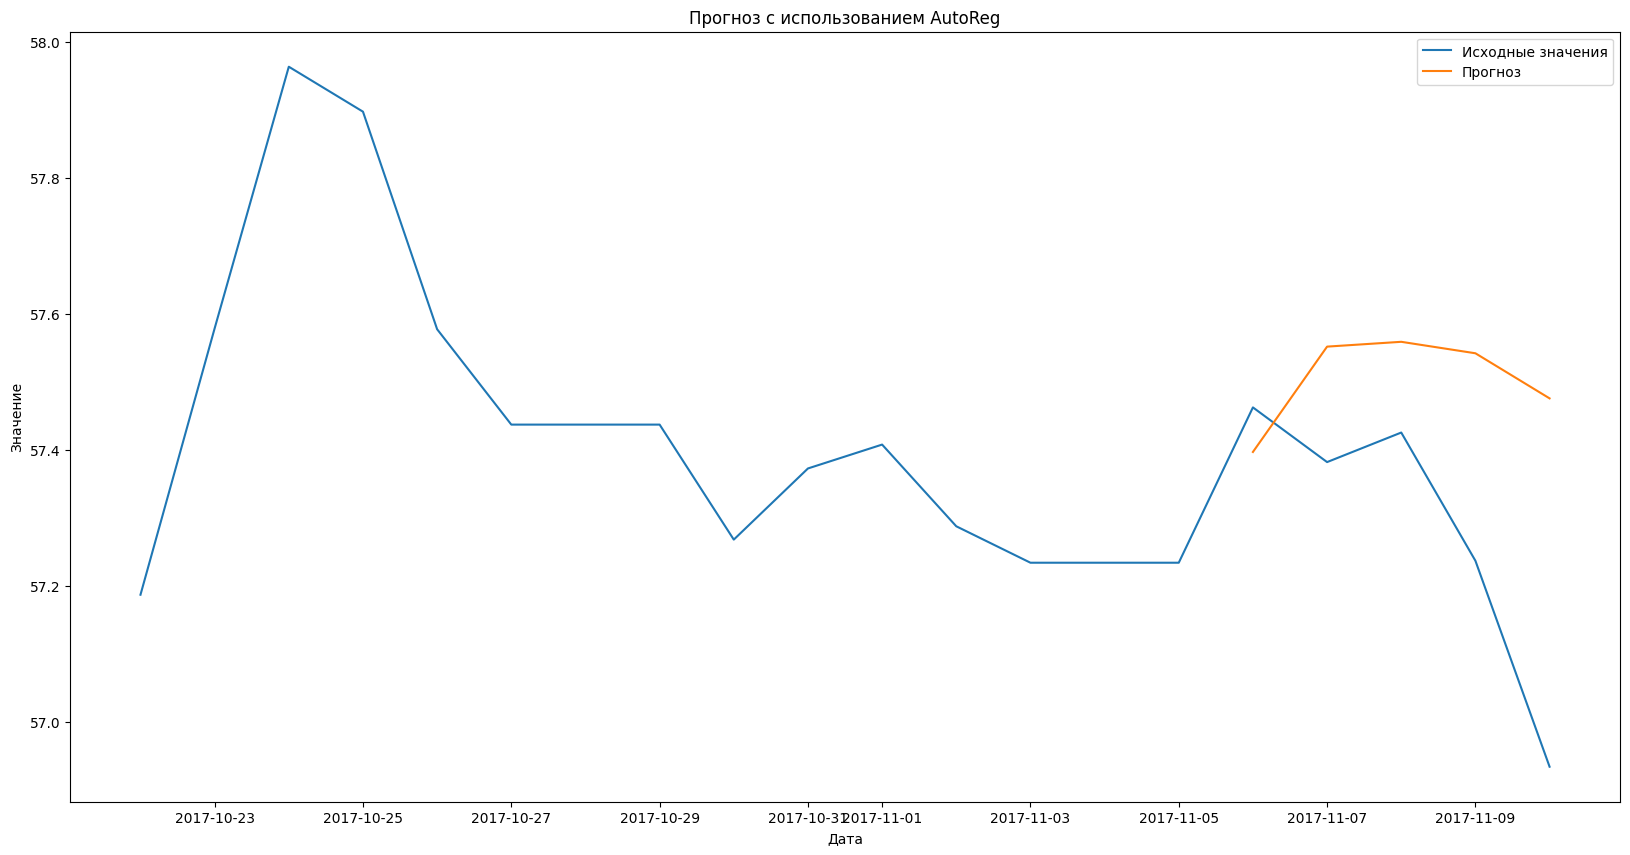

In [12]:
from statsmodels.tsa.ar_model import AutoReg
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')

ema = data["Close"].ewm(span=5).mean()
forecast_len = 5
model = AutoReg(ema[:-forecast_len], lags=300).fit()
forecast = model.forecast(steps=forecast_len)
plt.plot(data.index[-forecast_len*4:], ema[-forecast_len*4:], label="Исходные значения")
plt.plot(data.index[-forecast_len:], forecast, label="Прогноз")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("Прогноз с использованием AutoReg")
plt.legend()
plt.show()

Экспоненциальное скользящее среднее даёт сглаженную линию, показывая основной тренд без сильных скачков. Поскольку исходные данные сглажены, прогноз также следует этому сглаженному тренду, что может снижать точность прогноза краткосрочных колебаний.




## Заключение


В ходе лабораторной работы были изучены и реализованы методы анализа временных рядов с использованием скользящих средних, экспоненциальных скользящих средних (EMA) и авторегрессионных моделей (AutoReg). Эти методы позволили оценить тренды в данных, сгладить колебания цен и выполнить краткосрочный прогноз.

Скользящие средние (SMA) показали, как сглаживание данных может уменьшить влияние случайных всплесков, позволяя лучше увидеть общие тенденции в данных. Однако для разных значений окна скользящего среднего поведение трендов отличается: малые окна выявляют краткосрочные колебания, тогда как большие окна более наглядно показывают долгосрочные тренды.

Экспоненциальное скользящее среднее (EMA) показало более чувствительную реакцию на недавние изменения в данных, что делает его более актуальным для анализа краткосрочных тенденций. EMA, в отличие от SMA, придает больший вес последним данным, что позволило уловить свежие колебания на рынке быстрее.

Авторегрессионная модель (AutoReg) позволила создать краткосрочный прогноз на основе временного ряда. Модель успешно предсказала котировки на несколько дней вперед, следуя за сглаженной линией EMA, уловив общий тренд.